# Real files

## Import statements

In [1]:
import json
import pandas as pd
import pathlib

## Setup

The files for this class are stored in the `data/real` directory:

In [2]:
directory = pathlib.Path("data") / "real"

## Exercise 1 – World Bank

The dataset for this exercise is the population of Spain, taken from the Work Bank.

Explore the World Bank API:
* Information about Spain: http://api.worldbank.org/v2/country/es
* Results as JSON: http://api.worldbank.org/v2/country/es?format=json
* Information about Belgium: http://api.worldbank.org/v2/country/be?format=json
* Information about Spain & Belgium: http://api.worldbank.org/v2/country/es;be?format=json
* Information about all countries: http://api.worldbank.org/v2/country/all?format=json
* Population: https://data.worldbank.org/indicator/SP.POP.TOTL
* Population in Spain (1971-2020): http://api.worldbank.org/v2/country/es/indicator/SP.POP.TOTL?format=json
* Population in Spain (before 1971): http://api.worldbank.org/v2/country/es/indicator/SP.POP.TOTL?format=json&page=2
* Population in Spain (complete): http://api.worldbank.org/v2/country/es/indicator/SP.POP.TOTL?format=json&per_page=100

Guide for the World Bank API: https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures

### Skeleton

Suggested steps:
* Try to import the JSON data with `pd.read_json()`
* In case of failure, turn the JSON file into a python object:
```python
with open(file) as f:
    python_object = json.load(f)
```
* Explore the python object to identify a list that would be suitable as rows in the dataframe
* [Advanced] Plot the population of Spain as a function of the year

In [3]:
filename = "exercise-1.json"
file = directory / filename

Try to import the JSON file into a dataframe named `df` using the simplest approach:

In [40]:
#Raises an error because the file has a weird format
df = pd.read_json(file)

AttributeError: 'list' object has no attribute 'keys'

Turn the JSON file into a Python object:

In [5]:
with open(file) as f:
    python_object = json.load(f)

Search and **identify a list of populations** inside this Python object.  
Check the type of this Python object:

In [9]:
type(python_object)

list

If it is a dictionary, check its keys; if it is a list, check its length:

In [22]:
len(python_object)

2

This object only has 2 elements, so cannot be the list of populations since 1971... **keep diving to find a promising list!**

In [25]:
python_object[0]

{'page': 1,
 'pages': 1,
 'per_page': 100,
 'total': 61,
 'sourceid': '2',
 'lastupdated': '2021-02-17'}

In [26]:
python_object[1]

[{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ES', 'value': 'Spain'},
  'countryiso3code': 'ESP',
  'date': '2020',
  'value': None,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ES', 'value': 'Spain'},
  'countryiso3code': 'ESP',
  'date': '2019',
  'value': 47076781,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ES', 'value': 'Spain'},
  'countryiso3code': 'ESP',
  'date': '2018',
  'value': 46797754,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country': {'id': 'ES', 'value': 'Spain'},
  'countryiso3code': 'ESP',
  'date': '2017',
  'value': 46593236,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
  'country':

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

Once a list has been found, import it into a dataframe named `df`:

In [27]:
df = pd.json_normalize(python_object[1])

Check the first 5 rows of the dataframe:

In [28]:
df.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,ESP,2020,NaN,,,0,SP.POP.TOTL,"Population, total",ES,Spain
1,ESP,2019,47076781.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain
2,ESP,2018,46797754.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain
3,ESP,2017,46593236.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain
4,ESP,2016,46484062.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain


Check the data types of the columns:

In [29]:
df.dtypes

countryiso3code     object
date                object
value              float64
unit                object
obs_status          object
decimal              int64
indicator.id        object
indicator.value     object
country.id          object
country.value       object
dtype: object

When using `.plot()`, the index will be used for the X-axis, and the column for the Y-axis.

Set the `date` column to be the index of the dataframe:

In [34]:
df.set_index("date", inplace=True)

Check the first 5 rows of the dataframe:

In [35]:
df.head()

,countryiso3code,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
date,,,,,,,,,
2020,ESP,NaN,,,0,SP.POP.TOTL,"Population, total",ES,Spain
2019,ESP,47076781.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain
2018,ESP,46797754.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain
2017,ESP,46593236.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain
2016,ESP,46484062.0,,,0,SP.POP.TOTL,"Population, total",ES,Spain


Check the `value` column:

In [36]:
df.value

date
2020           NaN
2019    47076781.0
2018    46797754.0
2017    46593236.0
2016    46484062.0
           ...    
1964    31609195.0
1963    31296651.0
1962    31023366.0
1961    30739250.0
1960    30455000.0
Name: value, Length: 61, dtype: float64

Order the `value` column by the index:

In [38]:
df.sort_index(inplace=True)

Plot the `value` column (ordered by its index) using `.plot()`:

<AxesSubplot:xlabel='date'>

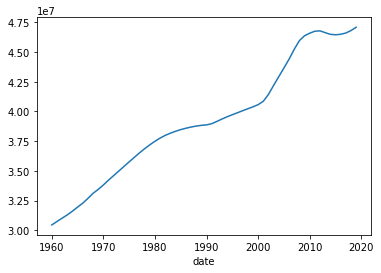

In [39]:
df.value.plot()

## Exercise 2 – ECDC

The dataset for this exercise is the [COVID-19 vaccination in the EU/EEA](https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea) data from the [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en).

In [ ]:
filename = "exercise-2.csv"
file = directory / filename

Import the CSV file into a dataframe:

Check the first 5 rows of the dataframe:

Check the shape of the dataframe:

A handful of countries (e.g. Finland, Poland) are reporting values at the country-level, but also at the regional level.  
Keep only the rows at country level (to avoid having to deal with different Denominator values later):

In [ ]:
country_codes = df["ReportingCountry"].unique()

In [ ]:
df = df.loc[df["Region"].isin(country_codes)]

Delete the `YearWeekISO`, `FirstDoseRefused`, `UnknownDose`, `NumberDosesReceived`, `Region`, and `Population` columns:

In [ ]:
columns = [
    "YearWeekISO",
    "FirstDoseRefused",
    "UnknownDose",
    "NumberDosesReceived",
    "Region",
    "Population",
]

Check the first 5 rows of the dataframe:

Keep only rows where the `TargetGroup` column is `ALL`:

Check the shape of the dataframe:

Check the first 5 rows of the dataframe:

Check the column data types:

Turn the `Denominator` column into integers:

Turn the `ReportingCountry`, `TargetGroup`, and `Vaccine` columns into categoricals:

Check the corrected column data types:

Rename vaccines:

In [ ]:
vaccines = {
    "COM": "Pfizer",
    "MOD": "Moderna",
    "AZ": "AstraZeneca",
    "JANSS": "Janssen",
    "SPU": "Sputnik",
    "BECNBG": "CNBG",
    "UNK": "Unknown",
}

In [ ]:
df["Vaccine"] = df["Vaccine"].cat.rename_categories(vaccines)

Rename countries:

In [52]:
countries = {
    "AT": "Austria",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "HR": "Croatia",
    "CY": "Cyprus",
    "CZ": "Czechia",
    "DK": "Denmark",
    "EE": "Estonia",
    "FI": "Finland",
    "FR": "France",
    "DE": "Germany",
    "EL": "Greece",
    "HU": "Hungary",
    "IS": "Iceland",
    "IE": "Ireland",
    "IT": "Italy",
    "LV": "Latvia",
    "LI": "Liechtenstein",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "MT": "Malta",
    "NL": "Netherlands",
    "NO": "Norway",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SK": "Slovakia",
    "SI": "Slovenia",
    "ES": "Spain",
    "SE": "Sweden",
}

In [ ]:
df["ReportingCountry"] = df["ReportingCountry"].cat.rename_categories(countries)

Check the first 5 rows of the dataframe:

Create a new dataframe named `doses` with the cumulated number of doses per country (keeping the first value from the `Denominator` column):

Check the first 5 rows of the `doses` dataframe:

Create new `FirstDosePercentage` and `SecondDosePercentage` columns expressed as percentages (leveraging the `Denominator` column):

## Bonus: Downloading data with `requests`

In [41]:
import requests

Define the location and filename to store the data:

In [42]:
filename = "vaccination.csv"
file = directory / filename

Define the URL:

In [43]:
url = "https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv"

Download the data:

In [44]:
response = requests.get(url)

Check that the connection was succesful:

In [45]:
response.raise_for_status()

Save the data locally:

In [46]:
with open(file, "wb") as file_descriptor:
    for chunk in response.iter_content(chunk_size=128):
        file_descriptor.write(chunk)

## Bonus: `geopandas`

In [47]:
import geopandas

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

Get the data for a World map:

In [49]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

Plot the map (without data):

<AxesSubplot:>

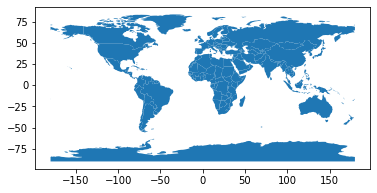

In [50]:
world.plot()

Select EU countries:

In [53]:
europe = world[world["name"].isin(countries.values())]

Plot the map (without data):

<AxesSubplot:>

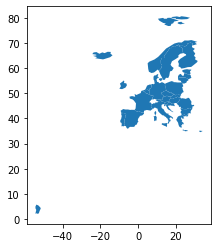

In [54]:
europe.plot()

Merge the doses data with the map data:

In [55]:
percentages_df = pd.merge(europe, doses, left_on="name", right_index=True)

NameError: name 'doses' is not defined

Plot the map (with data):

In [ ]:
percentages_df.plot(column="FirstDosePercentage")

Customize the map:

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the percentages on the map:
percentages_df.plot(ax=ax, column="FirstDosePercentage", legend=True)

# Configure the plot:
ax.set_title("COVID-19 Vaccination percentages (ECDC)", fontsize=20)
ax.set_axis_off()
ax.axis("equal")
ax.set_xlim(-30)
ax.set_ylim(30)

Save the figure:

In [ ]:
fig.savefig(directory / "Vaccination-EU.pdf")